# Classificação de flores - iris dataset

Autor: Fernando Melo


## Introdução


Como muitas outras flores, o nome Iris é derivado da mitologia grega. Acredita-se que as íris são os arco-íris que ligam o céu e a terra. Iris, o mensageiro dos deuses, liga os deuses à humanidade. Eles acreditavam que ela ligava um extremo do mundo ao outro na velocidade do vento.

A íris tornou-se um símbolo para monarcas e famílias reais ao longo da história. O exemplo mais antigo disso é a descoberta das obras de arte da íris em um palácio na ilha de Creta desde 2100 aC. A íris ainda é usada hoje como um símbolo da realeza em todo o mundo.  
fonte: https://www.blueorchidblog.com/guide-different-types-iris-flowers/


### Exemplo de treinamento supervisionado - classificação da espécie das flores íris.

Dados: Íris dataset (UCI Machine Learning Repository).  
Este talvez seja o banco de dados mais conhecido na literatura de reconhecimento de padrões.
O artigo de Fisher é um clássico no campo e é referenciado com frequência até hoje. (Consulte Duda & Hart, por exemplo.)

Características do conjunto de dados:  
Número de Instâncias 150 (50 em cada uma das três classes).  
Número de atributos: 4 atributos numéricos, preditivos e a classe.  
Informações sobre atributos:

- comprimento da sépala (cm)
- largura da sépala (cm)
- comprimento da pétala (cm)
- largura da pétala (cm)

classe (tipos de espécies):

- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

![iris](./iris_ml.png)


## Análise exploratória dos dados


In [1]:
# Bibliotecas úteis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Carregar dados
from sklearn.datasets import load_iris

# Cria uma instância dos dados do íris dataset
iris = load_iris()

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# Rótulos das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Nome das variáveis independentes ou 'features'
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# Variáveis independentes, X, ou 'features' : comprimento_sepala, largura_sepala, comprimento_petala, largura_petala.
iris.data[80]

array([5.5, 2.4, 3.8, 1.1])

In [9]:
# Variável dependente, 'y' ou 'target'
print(iris.target[80])
iris.target_names[1]

1


'versicolor'

## Dados de treinamento


In [10]:
# Mostra dados das variáveis independentes
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
# Mostra dados da variável dependente (ou objetivo, target, rótulo)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


([], [])

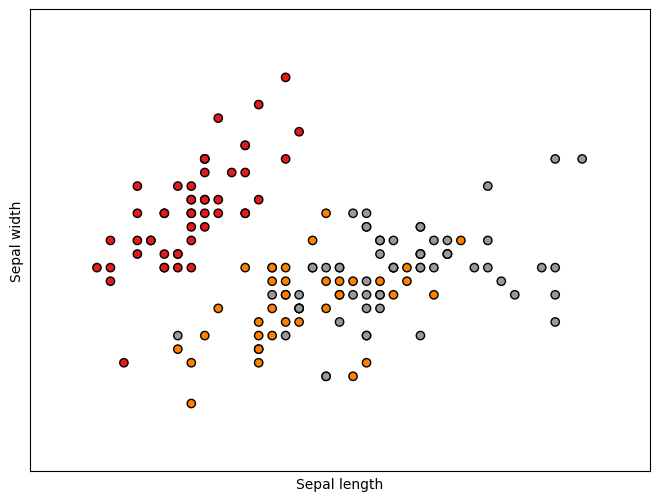

In [12]:
# Visualização com apenas as duas primeiras features: 'sepal length (cm)', 'sepal width (cm)'
# Adaptado de Gaël Varoquaux
X = iris.data[:, :2]  # só as duas primeiras colunas (sépalas)
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [13]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

/tmp/ipykernel_6128/2317091589.py:17: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/tmp/ipykernel_6128/2317091589.py:19: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/tmp/ipykernel_6128/2317091589.py:21: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

<Figure size 800x600 with 0 Axes>

## Treinamento supervisionado - classificação


Classificação é aprendizado supervisionado, no qual a predição é um valor categórico: 'setosa', 'versicolor', 'virginica'.

Tratamento nos dados para treinamento de modelol usando _scikit-learn_:

- variáveis independentes e dependente são objetos separados.
- variáveis independentes e dependente devem ser numéricos.
- variáveis independentes e dependente devem ser matrizes NumPy.
- variáveis independentes e dependente devem ter mesma dimensão.

Os objetos aqui são numéricos e estão separados:

- variáveis independentes = iris.data (comprimento_sepala, largura_sepala, comprimento_petala, largura_petala).
- variável dependente = iris.target (a classe pode ser: 'setosa', 'versicolor', 'virginica').


In [14]:
# Conferindo os tipos das variáveis independentes e dependente
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
# Conferindo as dimensões das variáveis independentes e dependente.
print("dimensão variáveis independentes = ", iris.data.shape)
print("dimensão variável dependente = ", iris.target.shape)

dimensão variáveis independentes =  (150, 4)
dimensão variável dependente =  (150,)


# Classificação K-vizinhos mais próximos (k-nearest neighbors ou knn)


- Escolha um valor para K.
- Pesquise as observações K nos dados de treinamento "mais próximos" das medidas da íris desconhecida.
- Use o valor de resposta mais popular dos K ​​vizinhos mais próximos como o valor de resposta previsto para a íris desconhecida.
  /content/04_knn_dataset.png

![This file is licensed under the Creative Commons Attribution-Share Alike 3.0 Unported license.](https://commons.wikimedia.org/wiki/File:Data3classes.png#/media/File:Data3classes.png)


# Inserir imagens aqui...

![](./iris_ml.png)
Image Credits: Data3classes, Map1NN, Map5NN by Agor153. Licensed under CC BY-SA 3.0


In [25]:
# Carregar modelo knn
from sklearn.neighbors import KNeighborsClassifier

# atribui os valores das variáveis independentes a 'X'
X = iris.data
# atribui os valores das variável dependente a 'y'
y = iris.target
# instancia modelo knn com k=5
knn = KNeighborsClassifier(n_neighbors=5)
# treina o modelo knn
knn.fit(X, y)

KNeighborsClassifier()

In [26]:
# Quero fazer a predição da espécie para uma nova flor com as dimensões: [5.1, 3.5, 1.4, 0.2]
pred = knn.predict([[2.1, 1.5, 3.4, 2.2]])
print("Modelo k-nearest neighbors")
print("nova predição:", "\n", "classe = ", pred)
print("classe = ", iris.target_names[pred])

Modelo k-nearest neighbors
nova predição: 
 classe =  [1]
classe =  ['versicolor']


In [27]:
knn.score(X, y)

0.9666666666666667

In [28]:
# Quero fazer a predição da espécie para uma nova flor com as dimensões: [6.4, 3.2, 4.5, 1.5]
pred = knn.predict([[2.4, 3.2, 4.5, 5.5]])
print("Modelo k-nearest neighbors")
print("nova predição:", "\n", "classe = ", pred)
print("classe = ", iris.target_names[pred])

Modelo k-nearest neighbors
nova predição: 
 classe =  [2]
classe =  ['virginica']


In [29]:
# Quero fazer a predição da espécie para uma nova flor com as dimensões: [5.8, 2.7, 5.1, 1.9]
pred = knn.predict([[5.8, 2.7, 5.1, 1.9]])
print("Modelo k-nearest neighbors")
print("nova predição:", "\n", "classe = ", pred)
print("classe = ", iris.target_names[pred])

Modelo k-nearest neighbors
nova predição: 
 classe =  [2]
classe =  ['virginica']


In [30]:
# Qual a acurácia do modelo knn?
knn.score(X, y)

0.9666666666666667

## Regressão Logística


## Plota gráfico da regressão logística


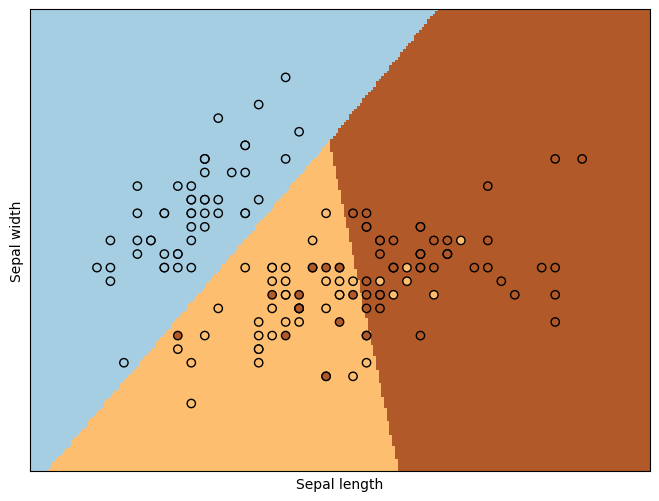

In [31]:
# Mostra a distribuição dos pontos de treinamento em espaço 2D (largura e comprimento das sépalas)
# Exemplo da documentação sklearn website.
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# from sklearn import datasets

# import some data to play with
# iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [32]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [34]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
# 1. separação treino/teste (20% teste e random_state=1)
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1
)

In [86]:
X_train.shape

(120, 4)

In [87]:
X_test.shape

(30, 4)

In [38]:
y_train.shape

(120,)

In [39]:
y_test.shape

(30,)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression(max_iter=200)

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [44]:
lr.score(X_train, y_train)

0.9833333333333333

In [45]:
lr.fit(X_test, y_test)

LogisticRegression(max_iter=200)

In [46]:
lr.score(X_test, y_test)

0.9666666666666667

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
normalizador = StandardScaler().fit(X_train)

In [49]:
X_train_normal = normalizador.transform(X_train)
# X_train_normal

In [50]:
X_test_normal = normalizador.transform(X_test)

In [74]:
lr_normal = LogisticRegression(max_iter=200).fit(X_train_normal, y_train)

In [75]:
lr_normal.score(X_train_normal, y_train)

0.975

In [76]:
lr_normal.coef_

array([[-1.04902721,  1.02502481, -1.78547737, -1.64014386],
       [ 0.66348067, -0.41779159, -0.36424012, -0.7697209 ],
       [ 0.38554653, -0.60723322,  2.14971749,  2.40986476]])

In [54]:
["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
# NÃO USE!
lr.coef_

array([[-0.33866022,  0.53689627, -1.48948943, -0.62261599],
       [-0.44406876, -0.34892844,  0.2591576 , -0.2628468 ],
       [ 0.78272898, -0.18796783,  1.23033184,  0.8854628 ]])

In [56]:
import pandas as pd

In [66]:
df_iris = pd.DataFrame(
    X,
    columns=[
        "comprimento_sepala",
        "largura_sepala",
        "comprimento_petala",
        "largura_petala",
    ],
)

In [58]:
df_iris

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [82]:
# FEATURE ENGINEERING
df_iris["area_sepala"] = df_iris.largura_sepala * df_iris.comprimento_sepala

df_iris["area_petala"] = df_iris.largura_petala * df_iris.comprimento_petala

In [83]:
df_iris

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,area_sepala,area_petala
0,5.1,3.5,1.4,0.2,17.85,0.28
1,4.9,3.0,1.4,0.2,14.70,0.28
2,4.7,3.2,1.3,0.2,15.04,0.26
3,4.6,3.1,1.5,0.2,14.26,0.30
4,5.0,3.6,1.4,0.2,18.00,0.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,11.96
146,6.3,2.5,5.0,1.9,15.75,9.50
147,6.5,3.0,5.2,2.0,19.50,10.40
148,6.2,3.4,5.4,2.3,21.08,12.42


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    df_iris, y, test_size=0.20, random_state=1
)

In [87]:
normalizador_area = StandardScaler().fit(X_train)

In [88]:
lr_area_normal = LogisticRegression(max_iter=200).fit(
    normalizador_area.transform(X_train), y_train
)

In [89]:
lr_area_normal.score(normalizador_area.transform(X_test), y_test)

0.9666666666666667

In [90]:
lr_area_normal.coef_

array([[-0.87754552,  0.9835998 , -1.50017532, -1.35801002,  0.01787815,
        -1.01355817],
       [ 0.57891963, -0.43811531,  0.00412212, -0.12651027,  0.13757952,
        -1.00013284],
       [ 0.29862589, -0.54548449,  1.4960532 ,  1.4845203 , -0.15545767,
         2.01369101]])

In [91]:
lr_normal.coef_

array([[-1.04902721,  1.02502481, -1.78547737, -1.64014386],
       [ 0.66348067, -0.41779159, -0.36424012, -0.7697209 ],
       [ 0.38554653, -0.60723322,  2.14971749,  2.40986476]])

In [92]:
# FEATURE ENGINEERING
df_iris["razao_sepala"] = df_iris.comprimento_sepala / df_iris.largura_sepala

df_iris["razao_petala"] = df_iris.comprimento_petala / df_iris.largura_petala

In [93]:
df_iris

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,area_sepala,area_petala,razao_sepala,razao_petala
0,5.1,3.5,1.4,0.2,17.85,0.28,1.457143,7.000000
1,4.9,3.0,1.4,0.2,14.70,0.28,1.633333,7.000000
2,4.7,3.2,1.3,0.2,15.04,0.26,1.468750,6.500000
3,4.6,3.1,1.5,0.2,14.26,0.30,1.483871,7.500000
4,5.0,3.6,1.4,0.2,18.00,0.28,1.388889,7.000000
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,11.96,2.233333,2.260870
146,6.3,2.5,5.0,1.9,15.75,9.50,2.520000,2.631579
147,6.5,3.0,5.2,2.0,19.50,10.40,2.166667,2.600000
148,6.2,3.4,5.4,2.3,21.08,12.42,1.823529,2.347826


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    df_iris, y, test_size=0.20, random_state=1
)

In [95]:
normalizador_area = StandardScaler().fit(X_train)

In [96]:
lr_completo_normal = LogisticRegression(max_iter=200).fit(
    normalizador_area.transform(X_train), y_train
)

In [97]:
lr_completo_normal.score(normalizador_area.transform(X_test), y_test)

0.9666666666666667

In [98]:
lr_completo_normal.coef_

array([[-0.70346544,  0.63964274, -1.2732622 , -1.08355815, -0.06911505,
        -0.85661723, -0.85643917,  0.62598156],
       [ 0.45547164, -0.19579213, -0.14044353, -0.35459601,  0.18131271,
        -1.07327094,  0.48555827, -0.45662312],
       [ 0.2479938 , -0.44385062,  1.41370573,  1.43815416, -0.11219766,
         1.92988818,  0.3708809 , -0.16935844]])

In [99]:
lr_area_normal.coef_

array([[-0.87754552,  0.9835998 , -1.50017532, -1.35801002,  0.01787815,
        -1.01355817],
       [ 0.57891963, -0.43811531,  0.00412212, -0.12651027,  0.13757952,
        -1.00013284],
       [ 0.29862589, -0.54548449,  1.4960532 ,  1.4845203 , -0.15545767,
         2.01369101]])

## FIM
